In [22]:
## importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [23]:
## loading fashion mnist dataset from keras
f_mnist= tf.keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test,Y_test)= f_mnist.load_data()

In [24]:
X_train_full.shape,Y_train_full.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

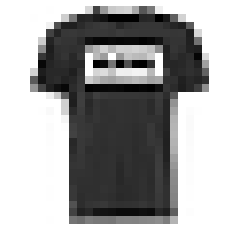

In [25]:
## visualizing the data
plt.imshow(X_train_full[1], cmap="binary")
plt.axis("off")
plt.show()

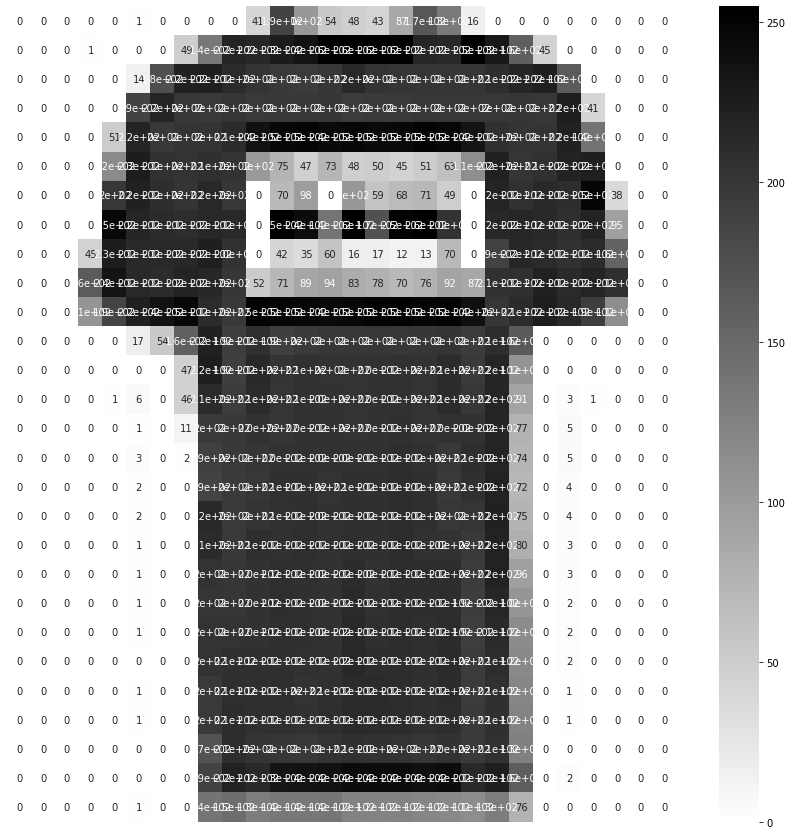

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[1],annot=True,cmap="binary")
plt.axis("off")
plt.show()

In [27]:
Y_train_full[1]

0

In [28]:
## splitting into train and validation set
X_valid, X_train= X_train_full[:5000]/255., X_train_full[5000:]/255.
Y_valid, Y_train= Y_train_full[:5000], Y_train_full[5000:]
X_test=X_test/255.

In [29]:
## building the model
LAYERS= [tf.keras.layers.Flatten(input_shape=[28,28], name="input_Layer"),
         tf.keras.layers.Dense(300, activation="relu",  name="hidden_layer_1"),
         tf.keras.layers.Dense(100, activation="relu",  name="hidden_layer_2"),
         tf.keras.layers.Dense(10, activation="softmax", name="output_layer")]

model = tf.keras.models.Sequential(LAYERS)



In [30]:
## getting insights into parameter
model.layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_Layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
weights, biases = model.layers[2].get_weights()
weights, biases
weights.shape, biases.shape


((300, 100), (100,))

In [32]:

## compliling the model
LOSS_FUNC='sparse_categorical_crossentropy'
METRICS=['accuracy']
OPTIMIZER="SGD"

model.compile(loss=LOSS_FUNC, optimizer=OPTIMIZER, metrics=METRICS)

validation_set= (X_valid, Y_valid)

history=model.fit(X_train, Y_train,
                  validation_data=validation_set,
                  epochs=30)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7139 - accuracy: 0.7688 - val_loss: 0.5033 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4852 - accuracy: 0.8302 - val_loss: 0.4934 - val_accuracy: 0.8204
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4413 - accuracy: 0.8442 - val_loss: 0.4058 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8532 - val_loss: 0.4363 - val_accuracy: 0.8470
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8615 - val_loss: 0.3845 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8659 - val_loss: 0.3710 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3625 - accuracy: 0.8704 - val_loss: 0.3548 - val_accuracy:

In [36]:
df= pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.713869,0.768782,0.503276,0.8304
1,0.485246,0.830200,0.493359,0.8204
2,0.441264,0.844182,0.405766,0.8632
3,0.413984,0.853236,0.436335,0.8470
4,0.392011,0.861527,0.384506,0.8662
5,0.376779,0.865927,0.371030,0.8692
6,0.362465,0.870382,0.354782,0.8756
7,0.351337,0.874273,0.357913,0.8716
8,0.340417,0.878855,0.341402,0.8798
9,0.332011,0.880873,0.340368,0.8804


(-1.4500000000000002, 30.45, 0.1884305238723755, 0.9563414096832276)

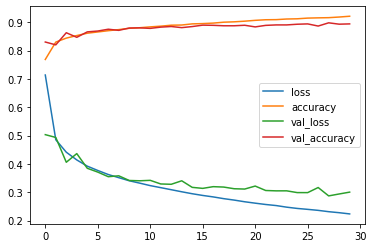

In [37]:
df.plot()
plt.axis(True)

In [38]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8817


[0.3332725763320923, 0.8816999793052673]